# Sentimen Analysis With LDA and SVM

## LOAD DATASET

In [1]:
import pandas as pd

df = pd.read_csv('Hasil Preproses.csv')
pd.set_option('max_colwidth', None)

In [2]:
df.head(5)

,Date,Tweet,Sentiment
0,2022-03-06 23:59:05,"['produk', 'hukum', 'uu', 'minerba', 'uu', 'cipta', 'kerja', 'revisi', 'sah', 'korporasi', 'tambang', 'ugalugalan']",negative
1,2022-03-06 23:42:19,"['uu', 'cipta', 'kerja', 'investor', 'bangsa', 'butuh', 'akselerasi', 'ekonomi', 'bangun']",positive
2,2022-03-06 22:46:04,"['produk', 'hukum', 'uu', 'minerba', 'uu', 'cipta', 'kerja', 'revisi', 'sah', 'korporasi', 'tambang', 'ugal']",negative
3,2022-03-06 20:34:23,"['produk', 'hukum', 'uu', 'minerba', 'uu', 'cipta', 'kerja', 'revisi', 'sah', 'korporasi', 'tambang', 'ugalugalan', 'video', 'direktur', 'operasional', 'pt', 'gema', 'kreasi', 'perdana', 'anak', 'usaha', 'harita', 'group', 'ancam', 'warga', 'tolak', 'tambang', 'roko', 'raya']",negative
4,2022-03-06 18:09:18,"['trial', 'error', 'milu', 'kardus', 'gembok', 'aman', 'hasil', 'milu', 'umum', 'malam', 'aman', 'uu', 'cipta', 'kerja']",negative


In [3]:
df.tail(5)

,Date,Tweet,Sentiment
450,2022-03-01 10:15:19,"['bagi', 'iya', 'udah', 'tanda', 'tangan', 'atas', 'materai', 'isi', 'terima', 'uang', 'kompensasi', 'kontrak', 'sesuai', 'undang', 'laku', 'liat', 'tuh', 'hilal', 'rekening', 'zonk', 'aja']",negative
451,2022-03-01 07:56:42,"['cab', 'tolak', 'omnibuslaw', 'bukti', 'omnibuslaw', 'nyata', 'inkonstitusional', 'mk']",negative
452,2022-03-01 06:50:19,"['ruh', 'elehhoax', 'ujar', 'benci', 'kritik', 'pakai', 'data', 'kritik', 'ruu', 'kpk', 'omnibuslaw', 'wadas', 'ikn', 'akademisi', 'kaum', 'ajar', 'sana', 'kritik', 'angin', 'gemuk', 'koalisi', 'buzzer', 'langsung', 'bunuh', 'karakter']",negative
453,2022-03-01 06:07:07,"['pulang', 'mas', 'urus', 'pake', 'bpjs', 'minyak', 'susah', 'kedelai', 'mahal', 'kerja', 'kekang', 'omnibuslaw', 'cair', 'jamsostek', 'nunggu', 'th', 'mending', 'hujan', 'emas', 'negeri', 'orang', 'hujan', 'batu', 'negeri']",negative
454,2022-03-01 04:26:45,"['engkong', 'putin', 'ogah', 'mampir', 'kemari', 'si', 'bang', 'bisikin', 'kuping', 'omnibuslaw', 'periode', 'minyak', 'goreng', 'langka']",negative


In [4]:
df['Sentiment'].count()

455

In [5]:
df.isna().sum()

Date         0
Tweet        0
Sentiment    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       455 non-null    object
 1   Tweet      455 non-null    object
 2   Sentiment  455 non-null    object
dtypes: object(3)
memory usage: 10.8+ KB


In [7]:
df['Sentiment'].value_counts()

positive    230
negative    225
Name: Sentiment, dtype: int64

## DATA VISUALIZATION

In [8]:
data = pd.read_csv('Hasil Preproses Wordcloud.csv')

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

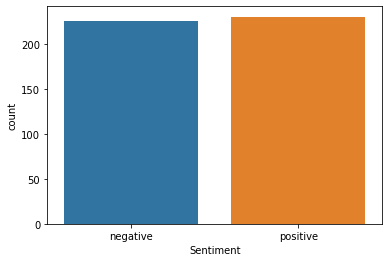

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

sns.countplot(x='Sentiment', data=data)

Text(0.5, 1.0, 'Frekuensi Kata Yang Paling Sering Muncul')

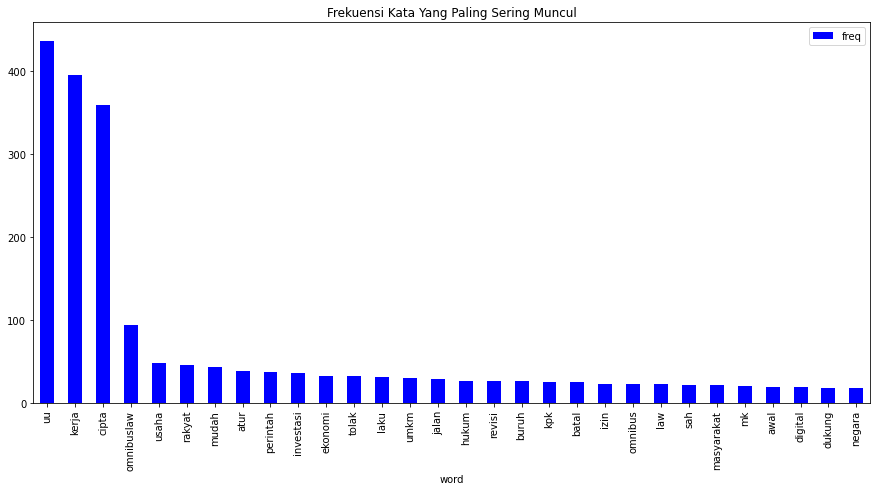

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df.Tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Frekuensi Kata Yang Paling Sering Muncul")

In [11]:
data['Sentiment'] = data['Sentiment'].replace('positive', 1)
data['Sentiment'] = data['Sentiment'].replace('negative', 0)

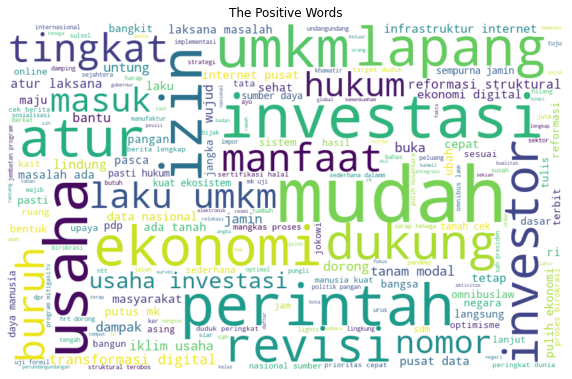

In [12]:
positive_words =' '.join([text for text in data['Tweet'][data['Sentiment'] == 1]])

wordcloud = WordCloud(background_color = 'white',width=800, height=500, random_state=5, max_font_size = 110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

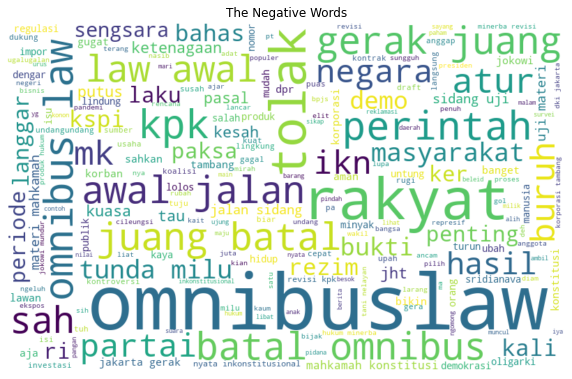

In [13]:
negative_words =' '.join([text for text in data['Tweet'][data['Sentiment'] == 0]])

wordcloud = WordCloud(background_color = 'white',width=800, height=500, random_state=5, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

## TF-IDF WEIGHTING

In [14]:
dm = pd.read_csv('Hasil Preproses.csv')

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=1.0, max_features = 5000,
                             min_df=0)
vektor = vectorizer.fit_transform(dm['Tweet'])

In [16]:
print(vektor)

  (0, 1401)	0.4073504257439385
  (0, 1305)	0.35613493734859547
  (0, 672)	0.372622641956434
  (0, 1158)	0.29459267227641
  (0, 1128)	0.2855337913049986
  (0, 621)	0.0938596325082858
  (0, 246)	0.09536104358079174
  (0, 831)	0.3639198500169866
  (0, 1424)	0.17986355100485585
  (0, 460)	0.2914480133936958
  (0, 1059)	0.3639198500169866
  (1, 132)	0.421440638758637
  (1, 342)	0.28430540236451957
  (1, 36)	0.5082954549966421
  (1, 221)	0.435854736866682
  (1, 131)	0.38105544906114325
  (1, 506)	0.3438975915800258
  (1, 621)	0.10042745224726483
  (1, 246)	0.10203392443086617
  (1, 1424)	0.09622474378412384
  (2, 1400)	0.4614691204112063
  (2, 1305)	0.3459510038454006
  (2, 672)	0.3619672307358419
  (2, 1158)	0.2861685839032583
  (2, 1128)	0.2773687481188006
  :	:
  (453, 945)	0.20886423436382692
  (453, 1078)	0.20886423436382692
  (453, 930)	0.16382896529472826
  (453, 797)	0.17909754064220026
  (453, 918)	0.08484172756448306
  (453, 1290)	0.1600026562139675
  (453, 1419)	0.1681668767547149

## SPLIT TRAIN TEST DATA

In [29]:
from sklearn import model_selection
train_X, test_X, train_Y, test_Y = model_selection.train_test_split(vektor, dm['Sentiment'], test_size = 0.1, random_state = 0)

In [30]:
print(train_X.shape)
print(test_X.shape)

(409, 1463)
(46, 1463)


In [31]:
print(train_Y.shape)
print(test_Y.shape)

(409,)
(46,)


## LABEL ENCODING (SKIP THIS STEP)

In [ ]:
import tensorflow as tf
import keras
import numpy as np

In [ ]:
tweet = vektor

In [ ]:
tweet

In [ ]:
labels = np.array(dm['Sentiment'])
y = []
for i in range(len(labels)):
    if labels[i] == 'negative':
        y.append(0)
    if labels[i] == 'positive':
        y.append(1)
y = np.array(y)
labels = tf.keras.utils.to_categorical(y, 2, dtype="int64")
del y

In [ ]:
len(labels)

## SVM Algorithm

In [32]:
from sklearn.svm import SVC
from sklearn import svm

model = SVC(kernel='linear')
model.fit(train_X,train_Y)

SVC(kernel='linear')

In [33]:
from sklearn.metrics import accuracy_score

svm_model = model.predict(test_X)
svm_accuracy = accuracy_score(svm_model, test_Y)*100
svm_accuracy = round(svm_accuracy,1)

In [34]:
svm_accuracy

89.1

## CONFUSION MATRIX

In [35]:
from sklearn.metrics import confusion_matrix

In [39]:
matrix = confusion_matrix(test_Y, svm_model)

Text(114.0, 0.5, 'Actual')

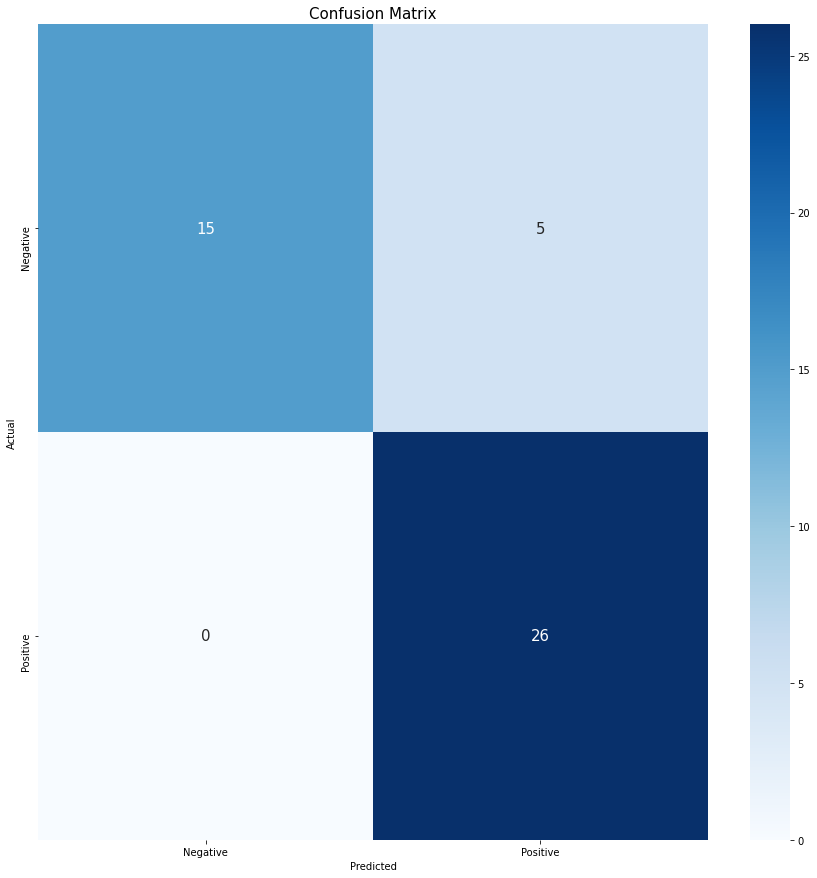

In [40]:
conf_matrix = pd.DataFrame(matrix, index = ['Negative','Positive'],columns = ['Negative','Positive'])

plt.figure(figsize = (15,15))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 15}, cmap='Blues', fmt='g')
plt.title('Confusion Matrix', fontsize = 15)
plt.xlabel("Predicted")
plt.ylabel("Actual")

## LDA TOPIC MODELLING